In [ ]:
import pandas as pd

df = pd.read_csv("Optimized_Staffing_Results_3.csv")
print(df.head())

  Country    Month  Available Agents  New Hires  Fired  Total Agents  \
0  Canada  2025-01             228.0        0.0  155.0         228.0   
1  Canada  2025-02              73.0        0.0    0.0          73.0   
2  Canada  2025-03              73.0        0.0    0.0          73.0   
3  Canada  2025-04              73.0        0.0    0.0          73.0   
4  Canada  2025-05              73.0        0.0    0.0          73.0   

   Assigned Advertisers  Waiting Advertisers  Dropped Advertisers  \
0                 371.0                  0.0                  0.0   
1                 345.0                  0.0                  0.0   
2                 354.0                  0.0                  0.0   
3                 357.0                  0.0                  0.0   
4                 370.0                  0.0                  0.0   

   Graduated Advertisers  Total Cost ($)  Revenue Uplift ($)  \
0                    0.0      4945860.00          2264192.60   
1                    0.0

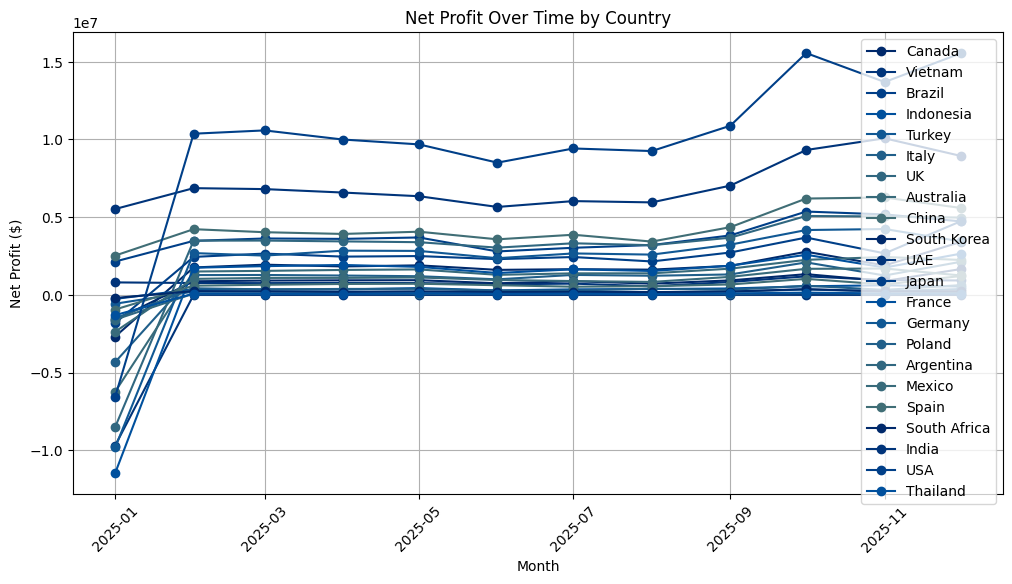

In [ ]:
import matplotlib.pyplot as plt

# Define the color bands
color_palette = [
    "#00296B", "#00347A", "#003F88", "#00509D", "#105894",
    "#205F8A", "#306780", "#386B7B", "#406E76"
]

# Convert 'Month' to datetime for better visualization
df['Month'] = pd.to_datetime(df['Month'])

# Plot Net Profit over time for each country
plt.figure(figsize=(12, 6))
for i, country in enumerate(df['Country'].unique()):
    country_df = df[df['Country'] == country]
    plt.plot(country_df['Month'], country_df['Net Profit ($)'], marker='o', linestyle='-', color=color_palette[i % len(color_palette)], label=country)

plt.xlabel("Month")
plt.ylabel("Net Profit ($)")
plt.title("Net Profit Over Time by Country")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


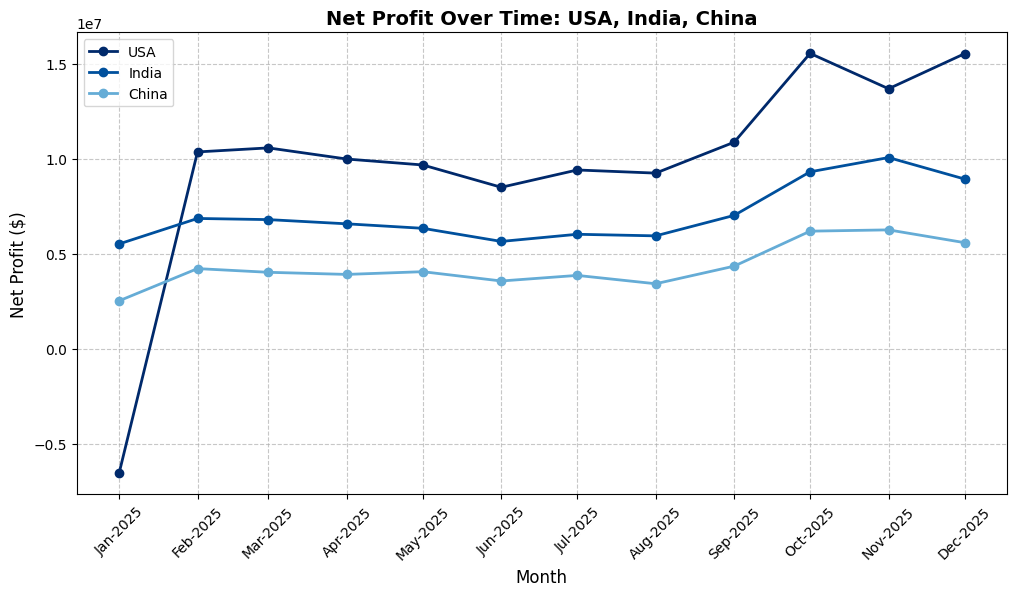

In [ ]:
import matplotlib.dates as mdates

# Filter data for USA, India, and China
selected_countries = ["USA", "India", "China"]
filtered_df = df[df["Country"].isin(selected_countries)]

# Define colors for the three selected countries
selected_colors = ["#00296b", "#00509d", "#65acd6"]

# Replot with all 12 months visible on the x-axis
plt.figure(figsize=(12, 6))

# Iterate through selected countries and plot their Net Profit trends
for i, country in enumerate(selected_countries):
    country_df = filtered_df[filtered_df["Country"] == country]
    plt.plot(country_df["Month"], country_df["Net Profit ($)"], marker='o', linestyle='-',
             color=selected_colors[i], label=country, linewidth=2)

# Formatting the x-axis to show all 12 months
plt.xlabel("Month", fontsize=12)
plt.ylabel("Net Profit ($)", fontsize=12)
plt.title("Net Profit Over Time: USA, India, China", fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc="upper left")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Ensure all 12 months are displayed
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

# Show the updated plot
plt.show()

/var/folders/hy/frf0zxvn1k5_c7zh7z63995r0000gn/T/ipykernel_48486/2304881745.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df["Cost Per Advertiser"] = usa_df["Total Cost ($)"] / usa_df["Assigned Advertisers"]
/var/folders/hy/frf0zxvn1k5_c7zh7z63995r0000gn/T/ipykernel_48486/2304881745.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df["Advertisers Per Agent"] = usa_df["Assigned Advertisers"] / usa_df["Available Agents"]


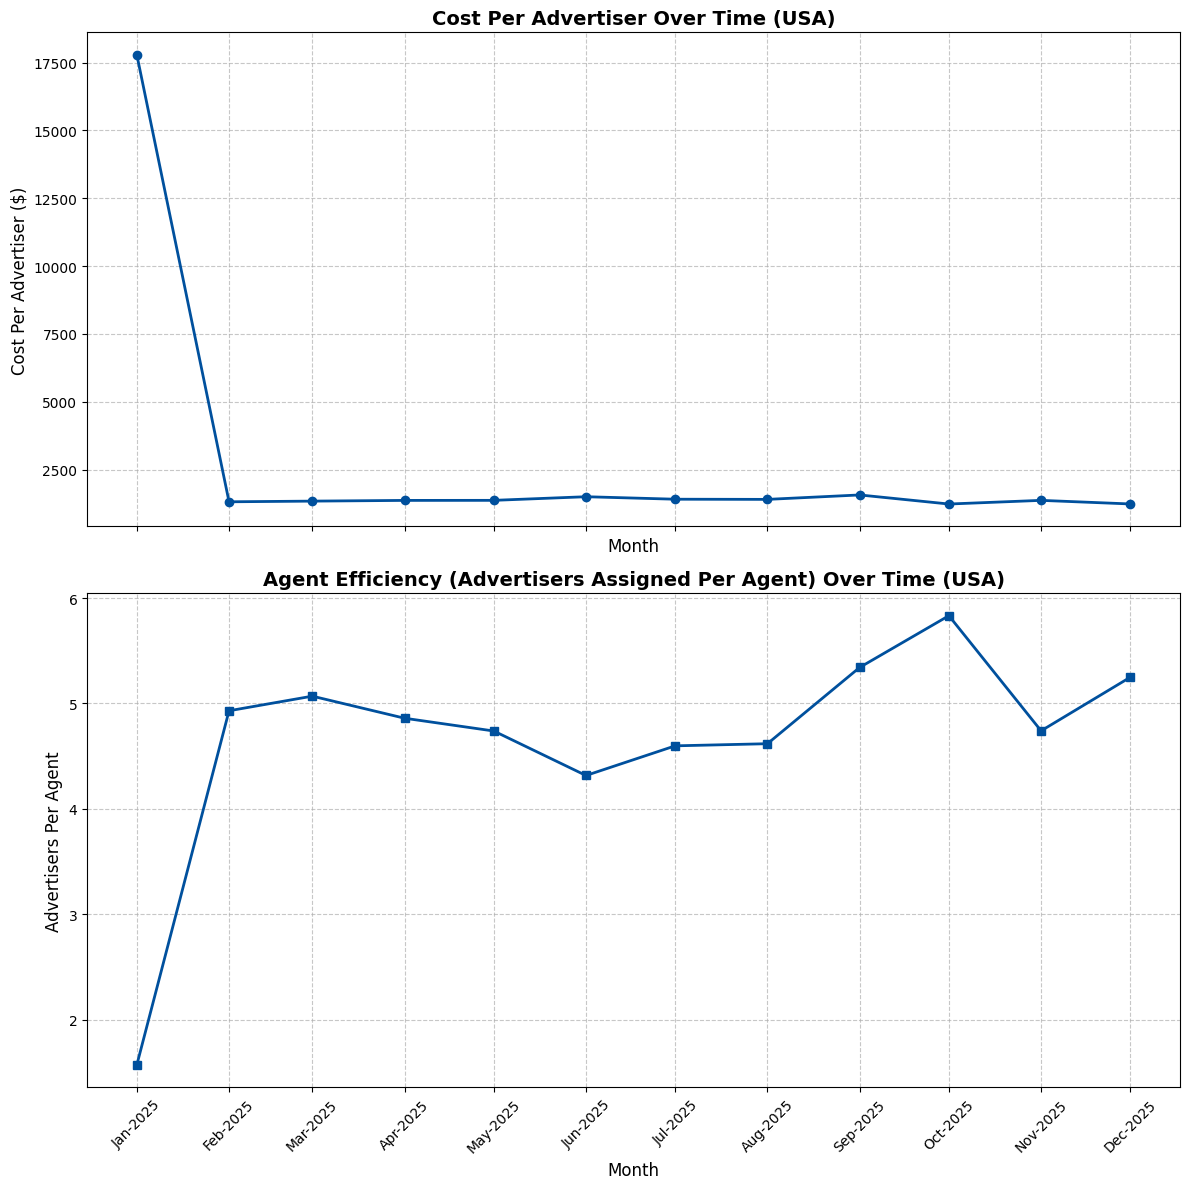

In [ ]:
# Filter data for only the USA
usa_df = df[df["Country"] == "USA"]

# Define color for USA analysis
usa_color = "#00509d"

# Create subplots to analyze cost per advertiser and agent efficiency
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

import matplotlib.dates as mdates

# Plot Cost Per Advertiser
plt.subplot(2, 1, 1)
usa_df["Cost Per Advertiser"] = usa_df["Total Cost ($)"] / usa_df["Assigned Advertisers"]
plt.plot(usa_df["Month"], usa_df["Cost Per Advertiser"], marker='o', linestyle='-', color=usa_color, linewidth=2)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Cost Per Advertiser ($)", fontsize=12)
plt.title("Cost Per Advertiser Over Time (USA)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Plot Agent Efficiency (Advertisers per Agent)
plt.subplot(2, 1, 2)
usa_df["Advertisers Per Agent"] = usa_df["Assigned Advertisers"] / usa_df["Available Agents"]
plt.plot(usa_df["Month"], usa_df["Advertisers Per Agent"], marker='s', linestyle='-', color=usa_color, linewidth=2)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Advertisers Per Agent", fontsize=12)
plt.title("Agent Efficiency (Advertisers Assigned Per Agent) Over Time (USA)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Ensure all 12 months are displayed
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


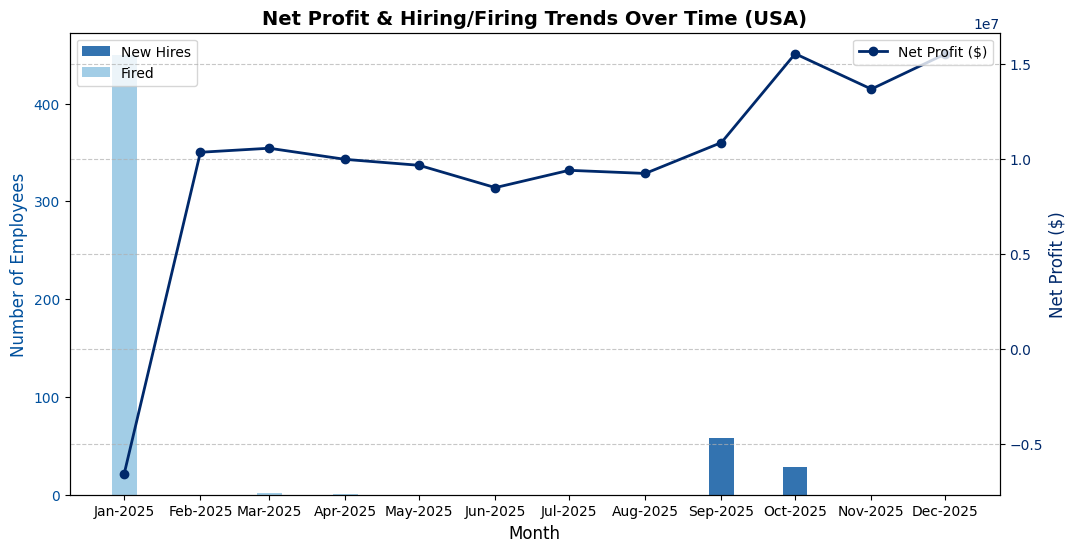

In [ ]:
import matplotlib.dates as mdates

# Create a combined chart for Net Profit and Hiring/Firing trends in the USA
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar width for better visibility
bar_width = 10

# Plot New Hires and Fired Employees as bars on primary y-axis
ax1.bar(usa_df["Month"], usa_df["New Hires"], color="#00509d", alpha=0.8, width=bar_width, label="New Hires")
ax1.bar(usa_df["Month"], usa_df["Fired"], color="#65acd6", alpha=0.6, width=bar_width, label="Fired")
ax1.set_ylabel("Number of Employees", fontsize=12, color="#00509d")
ax1.set_xlabel("Month", fontsize=12)
ax1.tick_params(axis='y', labelcolor="#00509d")

# Create a second y-axis for Net Profit
ax2 = ax1.twinx()
ax2.plot(usa_df["Month"], usa_df["Net Profit ($)"], marker='o', linestyle='-', color="#00296b", linewidth=2, label="Net Profit ($)")
ax2.set_ylabel("Net Profit ($)", fontsize=12, color="#00296b")
ax2.tick_params(axis='y', labelcolor="#00296b")

# Formatting the x-axis to show all 12 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

# Titles and formatting
plt.title("Net Profit & Hiring/Firing Trends Over Time (USA)", fontsize=14, fontweight='bold')
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the combined plot
plt.show()


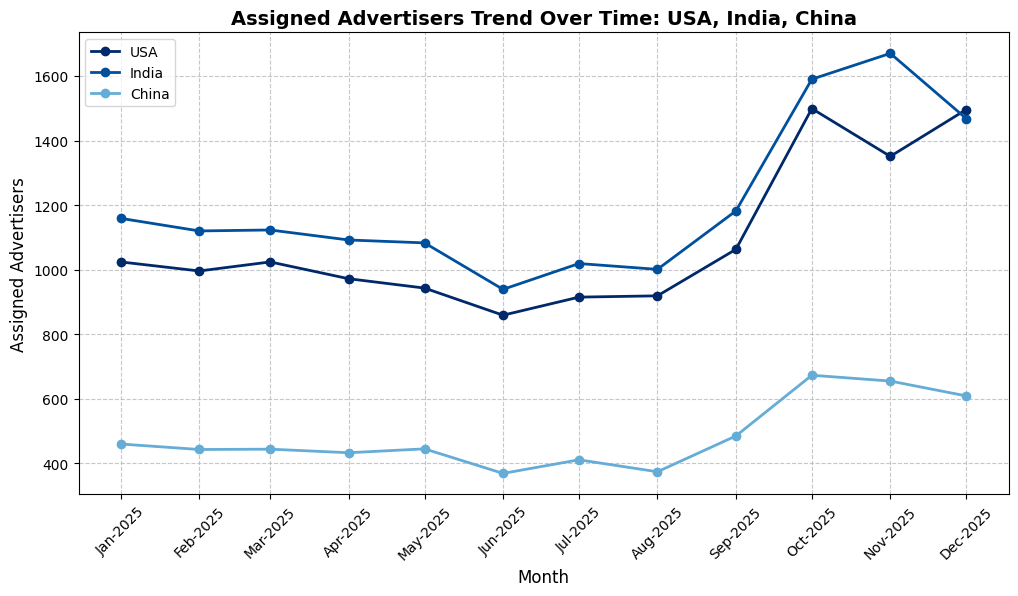

In [ ]:
import matplotlib.dates as mdates

selected_colors = {"USA": "#00296b", "India": "#00509d", "China": "#65acd6"}


# Create a line chart to compare assigned advertisers trend across countries
plt.figure(figsize=(12, 6))

# Plot assigned advertisers trend for each country
for country in selected_countries:
    country_df = filtered_df[filtered_df["Country"] == country]
    plt.plot(country_df["Month"], country_df["Assigned Advertisers"], marker='o', linestyle='-',
             color=selected_colors[country], label=country, linewidth=2)

# Formatting the x-axis to show all 12 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

# Labels and formatting
plt.xlabel("Month", fontsize=12)
plt.ylabel("Assigned Advertisers", fontsize=12)
plt.title("Assigned Advertisers Trend Over Time: USA, India, China", fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc="upper left")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()
